In [17]:
import pandas as pd
import seaborn as sns

# Carica il dataset
file_path = 'Test11.xls'
data = pd.read_excel(file_path)

In [18]:
# Visualizza le prime righe del dataset per avere un'idea del suo contenuto
print(data.head())

  StazCamp    Tacqua  Salinita    Taria      Patm  Conc
0       AN  19.10953  18.60094  20.3757  101387.3     0
1       AN  24.09344  30.50768  24.4922  101779.2     0
2       AN  27.74969  34.65139  24.9004  101658.2    40
3       AN  28.42774  35.92683  24.0963  101443.3    20
4       AN  28.56543  34.41238  25.9223  101350.6    20


In [19]:
# Descrizione del dataset
print(data.describe())

           Tacqua    Salinita       Taria           Patm          Conc
count  321.000000  321.000000  321.000000     321.000000    321.000000
mean    26.678573   37.777613   24.390294  101463.960436   2563.271028
std      2.128021    1.558258    2.619995     394.053084   7741.342839
min     16.228970   18.600940   13.401400  100377.200000      0.000000
25%     25.553050   37.909600   23.656200  101210.000000     40.000000
50%     26.495530   38.171590   24.610100  101427.800000    200.000000
75%     27.919980   38.290120   26.181500  101699.400000   1280.000000
max     32.426780   38.481900   29.961800  102540.600000  87280.000000


In [20]:
# Controlla la presenza di valori nulli
data.isnull().sum()

StazCamp    21
Tacqua       0
Salinita     0
Taria        0
Patm         0
Conc         0
dtype: int64

In [21]:
# Elimina i duplicati
data.drop_duplicates()

,StazCamp,Tacqua,Salinita,Taria,Patm,Conc
0,AN,19.10953,18.60094,20.3757,101387.3,0
1,AN,24.09344,30.50768,24.4922,101779.2,0
2,AN,27.74969,34.65139,24.9004,101658.2,40
3,AN,28.42774,35.92683,24.0963,101443.3,20
4,AN,28.56543,34.41238,25.9223,101350.6,20
...,...,...,...,...,...,...
316,ZO,28.12228,38.26596,27.8769,101858.8,3200
317,ZO,30.26889,38.47589,28.2884,101385.6,960
318,ZO,27.43176,38.18246,26.6261,101174.0,2800
319,ZO,26.90399,38.27003,26.3827,101075.6,7240


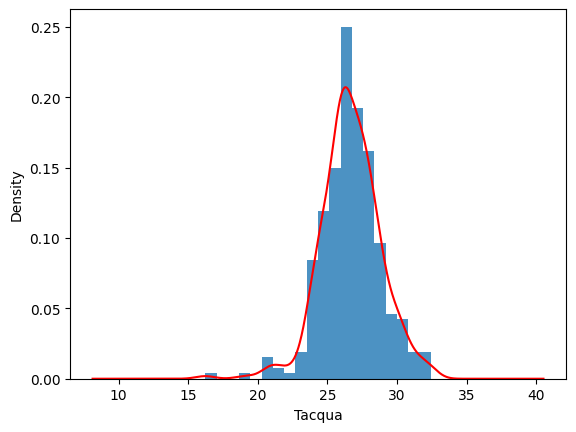

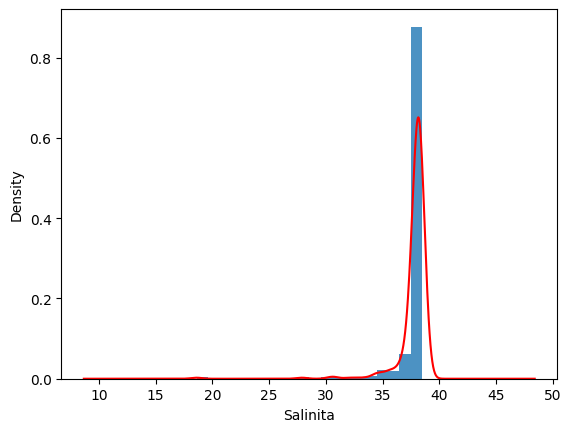

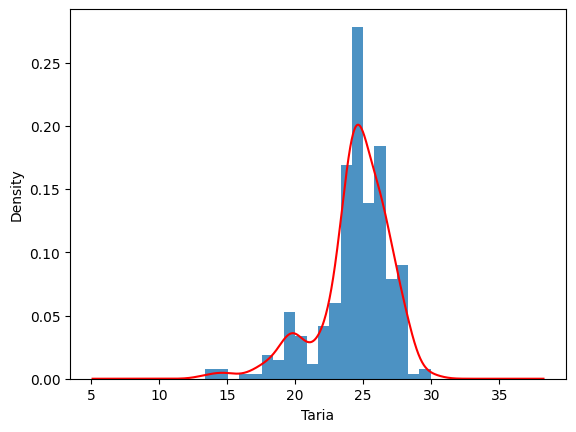

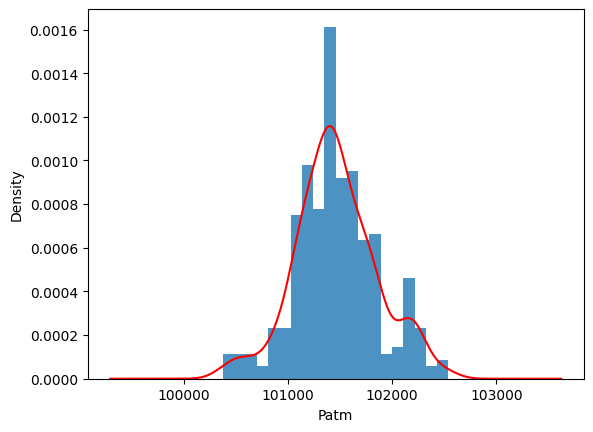

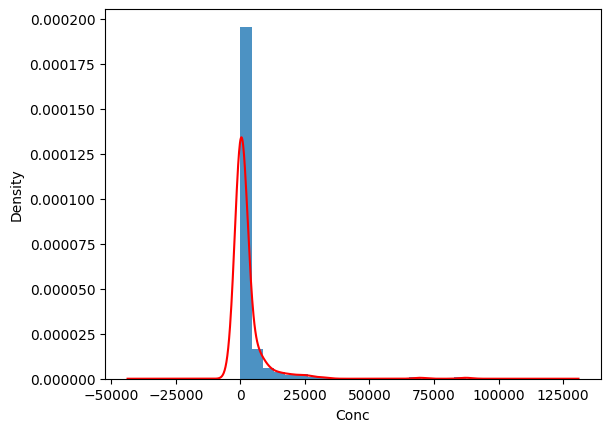

In [22]:
# Istogrammi e KDE
import matplotlib.pyplot as plt

for column in data.select_dtypes(include=['number']).columns:
    plt.figure()  # Crea una nuova figura per ogni istogramma
    data[column].plot(kind='hist', bins=20, alpha=0.8, label=f'Istogramma di {column}', density=True)
    data[column].plot(kind='kde', label=f'KDE di {column}', color='red')
    plt.xlabel(column)
    

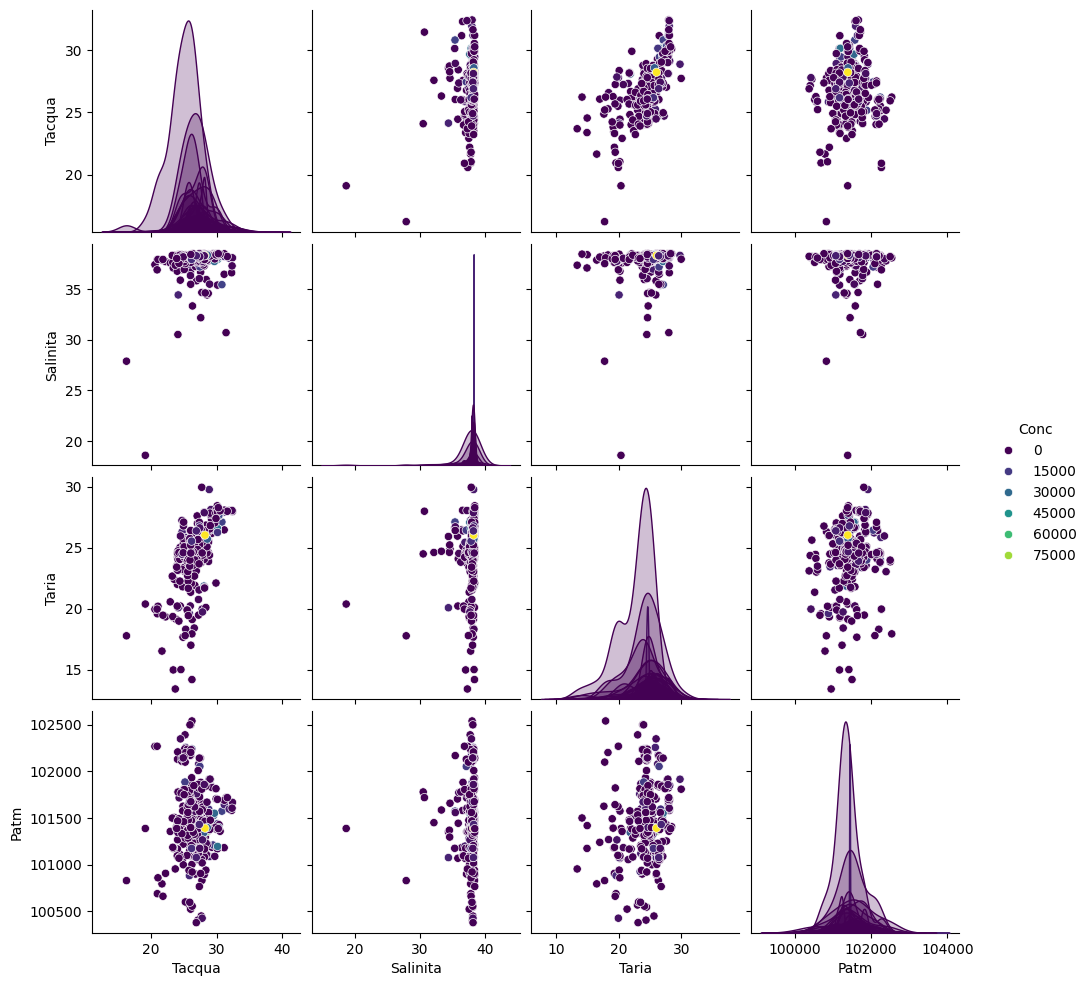

In [23]:
# Pairplot con outliers
sns.pairplot(data, hue='Conc', palette='viridis', )

In [24]:
# Rimozione outliers
from scipy import stats
import numpy as np

#Si eliminano i valori anomali analizzando lo z-score
data = data[(np.abs(stats.zscore(data['Conc'])) < 5)]

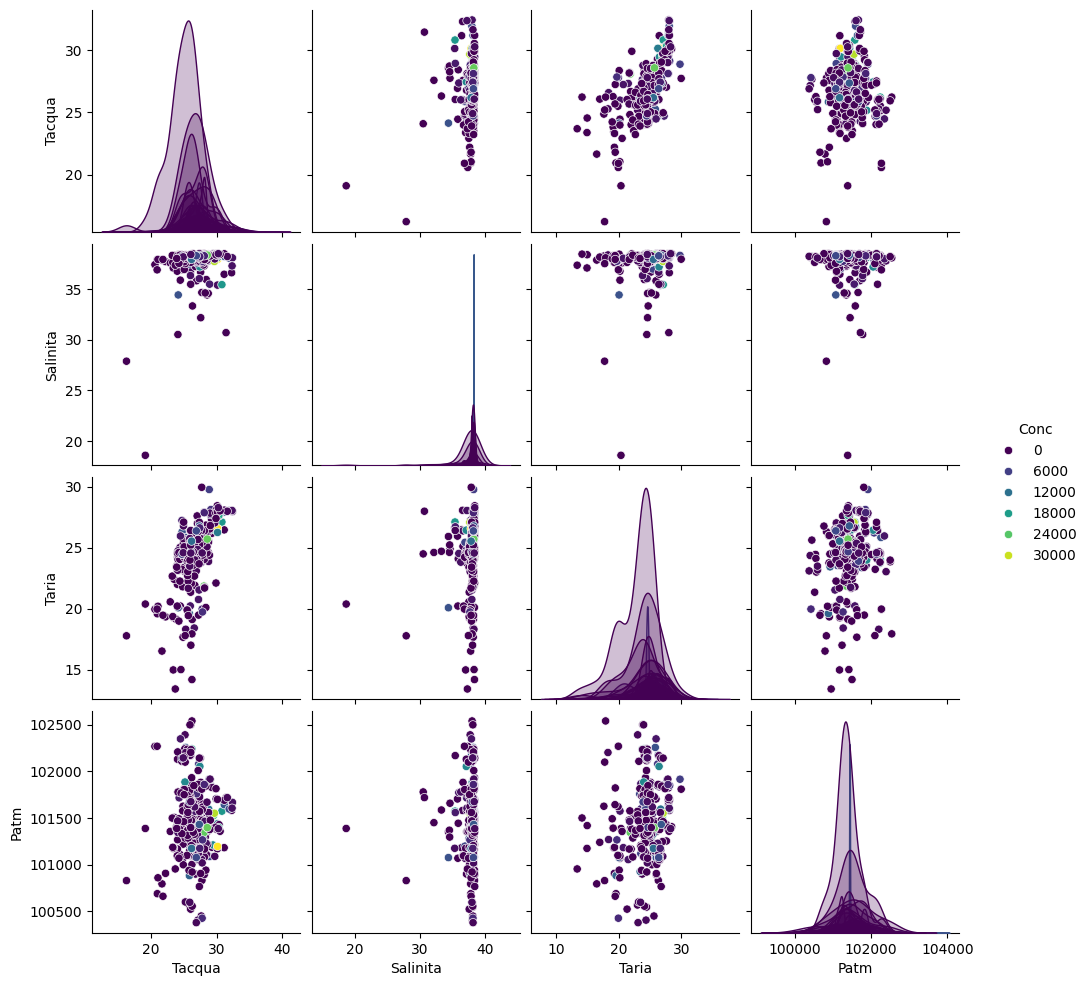

In [25]:
# Pairplot senza outliers
sns.pairplot(data, hue='Conc', palette='viridis')

In [26]:
# Describe
data.describe()

,Tacqua,Salinita,Taria,Patm,Conc
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,26.668473,37.774405,24.380689,101464.551724,2088.119122
std,2.130846,1.562620,2.625379,395.215602,4842.915357
min,16.228970,18.600940,13.401400,100377.200000,0.000000
25%,25.545785,37.909485,23.621400,101208.550000,40.000000
50%,26.489190,38.169180,24.599100,101430.200000,180.000000
75%,27.886275,38.288865,26.188800,101701.550000,1230.000000
max,32.426780,38.481900,29.961800,102540.600000,32640.000000


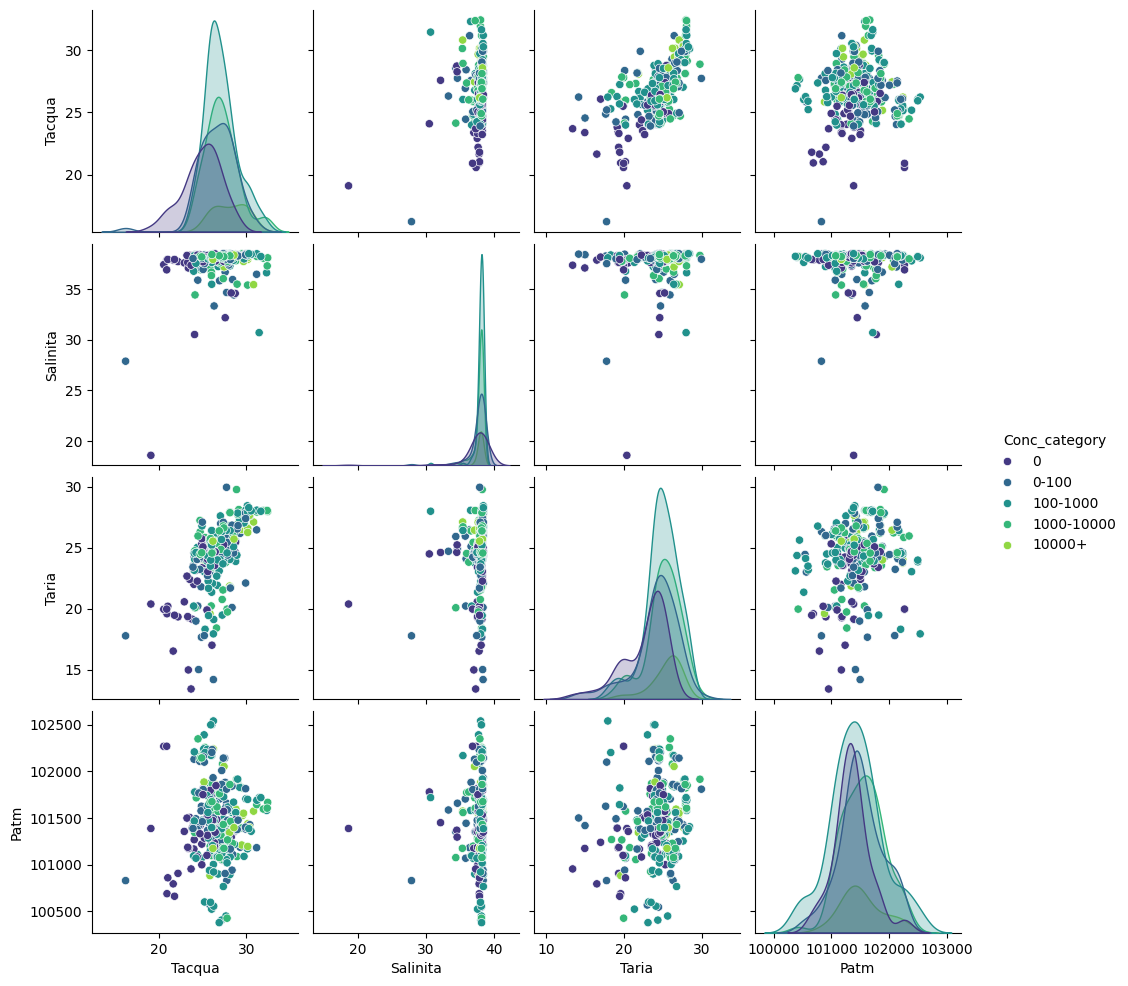

In [27]:
# Categorizzazione in classi per i valori della concentrazione
def categorize(values):
    categories = []
    for value in values:
        if value == 0:
            categories.append('0')
        elif 0 < value <= 100:
            categories.append('0-100')
        elif 100 < value <= 1000:
            categories.append('100-1000')
        elif 1000 < value <= 10000:
            categories.append('1000-10000')
        else:
            categories.append('10000+')
    return categories

# Applico la funzione sulla colonna 'Conc' e salvo il risultato in una nuova colonna 'Conc_category'
data_with_category = data.copy()
data_with_category['Conc_category'] = categorize(data['Conc'])

# Ordino le categorie in modo da avere un ordinamento naturale
ordered_categories = ['0', '0-100', '100-1000', '1000-10000', '10000+']
data_with_category['Conc_category'] = pd.Categorical(data_with_category['Conc_category'], categories=ordered_categories, ordered=True)
data_with_category = data_with_category.drop(columns=['Conc'])

sns.pairplot(data_with_category, hue='Conc_category', palette='viridis')


In [28]:
# Analisi della correlazione
data_without_categoric = data.drop(columns=['StazCamp'])
data_without_categoric.corr()

,Tacqua,Salinita,Taria,Patm,Conc
Tacqua,1.000000,0.221842,0.622518,0.004040,0.224162
Salinita,0.221842,1.000000,0.120018,0.016803,0.042424
Taria,0.622518,0.120018,1.000000,0.145921,0.167046
Patm,0.004040,0.016803,0.145921,1.000000,0.065843
Conc,0.224162,0.042424,0.167046,0.065843,1.000000


In [29]:
# Normalizzazione della colonna 'Conc' con logaritmo e trasformazione di Box-Cox
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

data['Conc'] = np.log10(np.where(data['Conc'] == 0, data['Conc'] + 1.01, data['Conc']))
data['Conc'], y_lambda = boxcox(data['Conc'])

# Normalizzazione standard delle colonne 'Tacqua', 'Salinita', 'Taria' e 'Patm'
columns_to_normalize_standard = ['Tacqua', 'Salinita', 'Taria', 'Patm']
scaler_standard = StandardScaler()
data[columns_to_normalize_standard] = scaler_standard.fit_transform(data[columns_to_normalize_standard])
print(data.head())

  StazCamp    Tacqua   Salinita     Taria      Patm      Conc
0       AN -3.552963 -12.289351 -1.527887 -0.195774  0.004321
1       AN -1.210354  -4.657652  0.042541  0.797394  0.004321
2       AN  0.508209  -2.001716  0.198268  0.490751  1.602060
3       AN  0.826916  -1.184214 -0.108493 -0.053857  1.301030
4       AN  0.891635  -2.154911  0.588118 -0.288781  1.301030


C:\Users\andre\AppData\Local\Temp\ipykernel_10248\2230896274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Conc'] = np.log10(np.where(data['Conc'] == 0, data['Conc'] + 1.01, data['Conc']))
C:\Users\andre\AppData\Local\Temp\ipykernel_10248\2230896274.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize_standard] = scaler_standard.fit_transform(data[columns_to_normalize_standard])


In [30]:
# Analisi della correlazione
data_without_categoric = data.drop(columns=['StazCamp'])
data_without_categoric.corr()

,Tacqua,Salinita,Taria,Patm,Conc
Tacqua,1.000000,0.221842,0.622518,0.004040,0.389687
Salinita,0.221842,1.000000,0.120018,0.016803,0.141504
Taria,0.622518,0.120018,1.000000,0.145921,0.346389
Patm,0.004040,0.016803,0.145921,1.000000,0.126549
Conc,0.389687,0.141504,0.346389,0.126549,1.000000


C:\Users\andre\AppData\Local\Temp\ipykernel_10248\1187936485.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_without_categoric.values, labels=box_titles)


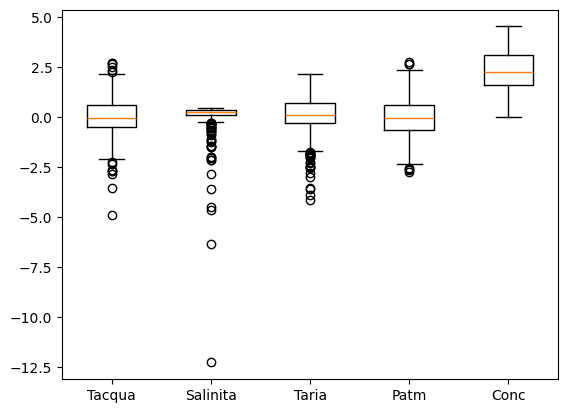

In [31]:
# Boxplot
box_titles = data_without_categoric.columns.tolist() # Estrai i nomi delle colonne come titoli per i box
plt.boxplot(data_without_categoric.values, labels=box_titles)
plt.show()